# Outlier Detection with Isolation Forest
by Eryk Lewinson on: [Towards Data Science](https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e)

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest

# Generating data

rng = np.random.RandomState(42)

# Generating training data

rng = np.random.RandomState(42)

# Generating training data
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating Outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50,2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

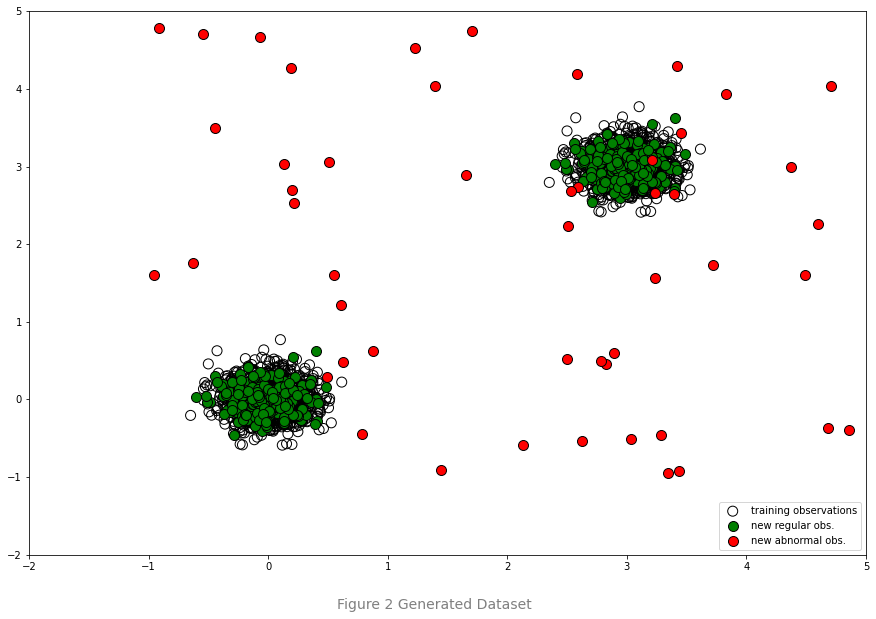

In [2]:
# Plot to match Figure 2 on the web site - ME

fig, ax = plt.subplots(figsize=(15,10))

size=100

ax.scatter(X_train['x1'], X_train['x2'],facecolor='None', edgecolor='black', s=size, label='training observations')
ax.scatter(X_test['x1'], X_test['x2'], facecolor='g', edgecolor='black', s=size, label='new regular obs.')
ax.scatter(X_outliers['x1'], X_outliers['x2'], facecolor='r', edgecolor='black', s=size, label='new abnormal obs.')

ax.set_xlim(-2,5)
ax.set_ylim(-2,5)
ax.legend(loc='lower right')
fig.text(0.5, 0.05, 'Figure 2 Generated Dataset', ha='center', fontsize=14, color='gray')

plt.show()
plt.close()


Now I need to train the Isolation Forest on the training set.  I am using the default settings here.  One thing worth noting is the contamination parameter, which specifies the percentage of observations we believe to be outliers (`scikit-learn`'s default value is 0.1).  
  
> **Note:** This changed in version 0.22.  The default is now 'auto'.  I had to change the parameters to match his results.  -MDE

In [3]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, contamination=0.1, random_state=rng)
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

Okay, so now we have the predictions.  How to asssess the performance?  We know that the test set contains only observations from the same distribution as the normal observations.  So, all of the test set observations should be classified as normal.  And vice versa for the outlier set.  Let's look at the accuracy.

In [4]:
# new, 'normal' observations ----
print('Accuracy:', list(y_pred_test).count(1)/y_pred_test.shape[0])
# Accuracy: 0.93

# outliers ----
print('Accuracy:', list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])
# Accuracy: 0.96

Accuracy: 0.93
Accuracy: 0.98


At first this looks pretty good, especially considering the default settings, however there is one issue still to consider.  As the outlier data was generated randomly, some of the outliers are actually located within the normal observations.  To inspect it more carefully, I will plot the normal observation dataset together with a labeled outlier set.  We can see that some of the outliers lying within the normal observation sets were correctly classified as regular observations, with a few of them being misclassified.  What we could do is to try different parameter specifications (contamination, number of estimators, number of samples to draw for training the base estimators, etc.) to get a better fit.  But for now, these results are satisfactory.

> **Note**- he had much better results than I did, until I discovered the change in defaults -MDE

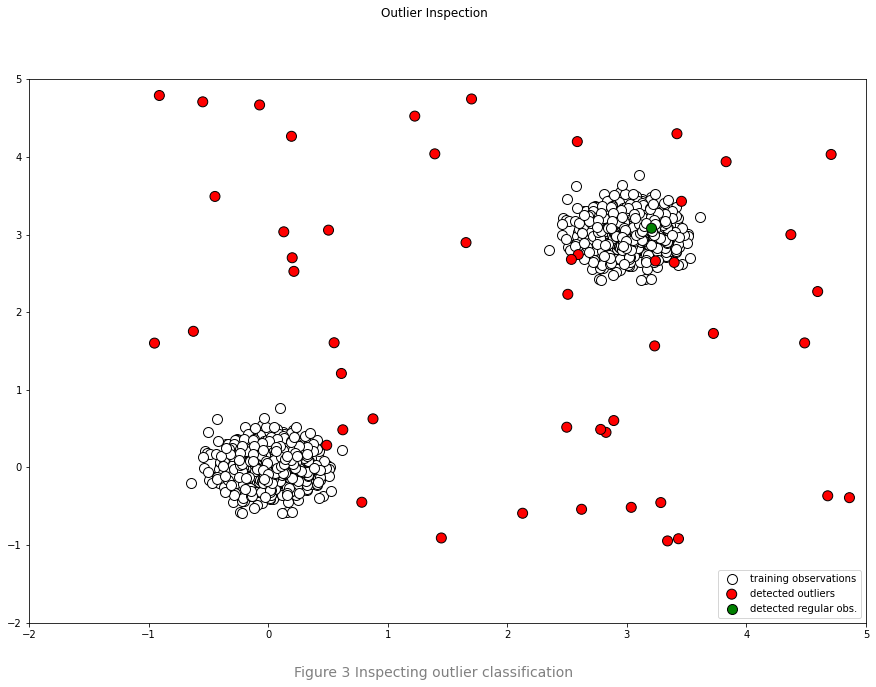

In [5]:
# Plot to match Figure 3 on the web site - ME

fig, ax = plt.subplots(figsize=(15,10))

size=100
colors = ['green' if x==1 else 'red' for x in y_pred_outliers]
ax.scatter(X_train['x1'], X_train['x2'],facecolor='white', edgecolor='black', s=size, label='training observations')
ax.scatter(X_outliers['x1'], X_outliers['x2'], facecolor=colors, edgecolor='black', s=size, label='detected outliers')
ax.scatter([],[],facecolor='green',edgecolor='black',s=size, label='detected regular obs.')

ax.set_xlim(-2,5)
ax.set_ylim(-2,5)
ax.legend(loc='lower right')
fig.suptitle('Outlier Inspection')
fig.text(0.5, 0.05, 'Figure 3 Inspecting outlier classification', ha='center', fontsize=14, color='gray')


plt.show()
plt.close()

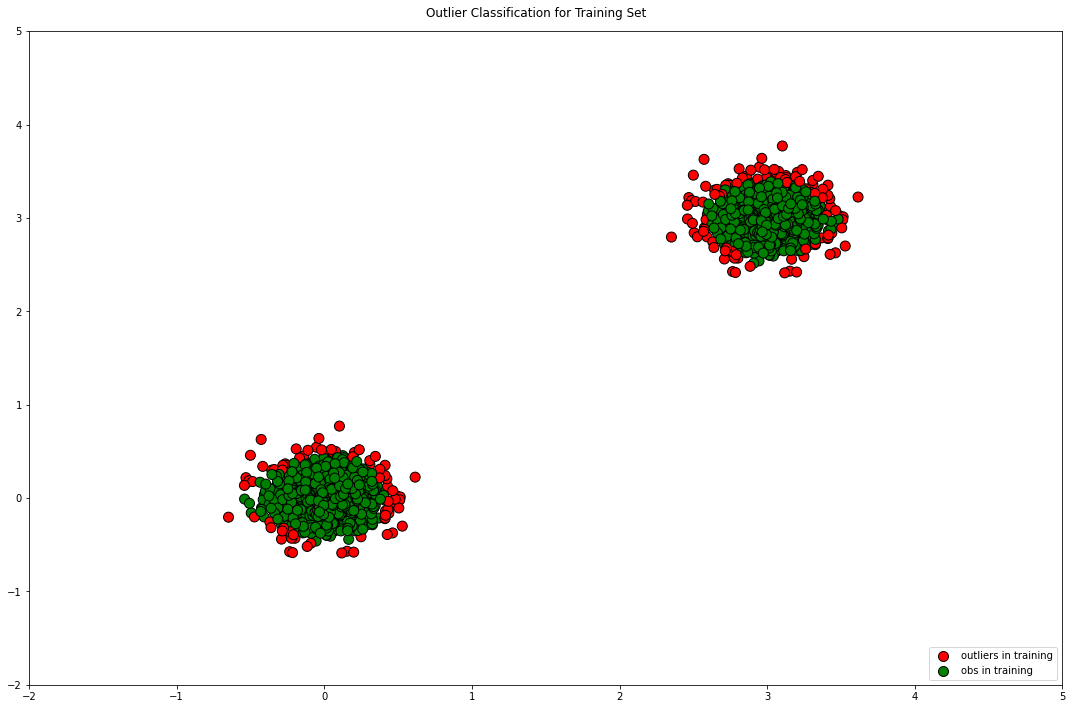

In [6]:
# -MDE Plot to see how the training set was sorted

fig, ax = plt.subplots(figsize=(15,10))

size=100
colors = ['green' if x==1 else 'red' for x in y_pred_train]
ax.scatter(X_train['x1'], X_train['x2'],facecolor=colors, edgecolor='black', s=size)

# Dummies for legend
ax.scatter([],[],facecolor='red',edgecolor='black',s=size, label='outliers in training')
ax.scatter([],[],facecolor='green',edgecolor='black',s=size, label='obs in training')

ax.set_xlim(-2,5)
ax.set_ylim(-2,5)
ax.legend(loc='lower right')
fig.suptitle('Outlier Classification for Training Set')
#fig.text(0.5, 0.05, 'Figure 3 Inspecting outlier classification', ha='center', fontsize=14, color='gray')

plt.tight_layout()
plt.show()
plt.close()